## 第5章 軽量な自然言語処理

本章では、岡倉天心の「茶の本」を題材に形態素解析器を用いた「軽量な自然言語解析」の演習を行う。下記リンクから「茶の本」のテキストファイルをダウンロードして、以下の課題に解答せよ。

[「茶の本」のテキストファイルをダウンロード](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_merosu.txt)

なお、演習に用いる形態素解析器は特に指定はしないが、一般的なWindowsユーザはインストールの簡便性を考慮して[janome](http://mocobeta.github.io/janome/)を利用することをお勧めする。janomeのインストール方法については、以下に記す。

ソースコードのコンパイル等の知識に明るいユーザは、精度・実行速度を優先するために[MeCab](http://taku910.github.io/mecab/)の利用をお勧めする。



### janomeのインストール
ターミナル上で以下のコマンドを実行。
```sh
pip install janome
```

In [1]:
from janome.tokenizer import Tokenizer
 
FILEPATH = "../data/natural-language-processing/cha_no_hon.txt"

### Q41. 動詞の抽出
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)からすべての動詞の原形を抽出し表示せよ（[言語処理100本ノック 2015 Q.31 改題](http://www.cl.ecei.tohoku.ac.jp/nlp100/)より）。

In [2]:
t = Tokenizer()

verbs = []
with open(FILEPATH) as f:
    text = f.read()

    for token in t.tokenize(text):
        pos_info = token.part_of_speech.split(",")
        if pos_info[0] == "動詞":
            verbs.append(token.base_form)

print(verbs)

['なる', '達す', '至る', '高める', '進める', '存する', 'する', '基づく', '教える', 'する', 'ある', 'する', 'する', 'いう', '合す', '表わす', 'いる', '説く', 'いう', '教える', 'なる', 'する', 'する', '表わす', 'いる', 'する', 'いる', 'する', 'なる', 'こうむる', 'いる', 'する', 'する', 'する', 'できる', '住む', '行き渡る', 'くる', '生ける', '知る', '愛でる', '至る', 'いう', 'おこる', '知る', 'とぶ', '浮かれる', '騒ぐ', 'ある', '過ぎる', '言う', 'する', 'つまる', '騒ぎ立てる', '思う', 'れる', 'しれる', 'いう', 'いう', '考える', 'みる', '煎る', 'あふれる', '求む', 'とまる', '飲みほす', 'れる', 'する', 'みる', 'もてはやす', 'とがめる', '及ぶ', 'する', 'する', 'する', '過ぎる', 'さえる', 'する', 'する', 'みる', 'ささげる', '流れ出る', '心ゆく', '楽しむ', 'もる', 'れる', 'ある', '触れる', 'できる', '存する', '感ずる', 'できる', '存する', 'なる', '見のがす', '見る', 'なす', 'いる', '過ぎる', '思う', '笑う', 'いる', 'ふける', 'いる', '見なす', 'いる', '行なう', '始める', '呼ぶ', 'いる', '喜ぶ', '勇む', '捨てる', 'させる', 'する', 'れる', 'くる', 'ひく', 'れる', 'いる', '説く', 'いる', 'よる', 'なる', 'する', '甘んじる', '払う', 'れる', '来る', '喜ぶ', '待つ', 'なる', 'する', 'する', '努める', '織る', '出す', 'れる', '冷やす', 'ある', '食べる', '生きる', 'いる', '吸う', '生きる', 'いる', '思う', 'れる', 'いる', '見る', '果てる', 'いう', 'いう', 'いう', 'あざける', '

### Q41. 名詞の抽出
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)からすべての名詞を抽出し、その出現頻度とともに表示せよ。

In [3]:
def extract_nouns_from(filepath):
    t = Tokenizer()

    nouns = {}
    with open(filepath) as f:
        text = f.read()

        for token in t.tokenize(text):
            pos_info = token.part_of_speech.split(",")
            if pos_info[0] == "名詞":
                nouns.setdefault(token.base_form, 0)
                nouns[token.base_form] += 1
    return nouns

print(extract_nouns_from(FILEPATH))

{'一': 66, '章': 16, '人情': 6, '碗': 7, '茶': 117, '薬用': 1, '始まり': 1, '後': 9, '飲料': 10, 'シナ': 37, '八': 11, '世紀': 35, '高雅': 3, '遊び': 2, '一つ': 12, '詩歌': 3, '域': 5, '十': 40, '五': 15, '日本': 27, 'これ': 82, '種': 7, '審美': 9, '的': 63, '宗教': 11, '茶道': 22, '日常': 3, '生活': 12, '俗事': 1, '中': 46, 'もの': 169, '崇拝': 11, 'こと': 226, '一種': 6, '儀式': 13, '純粋': 2, '調和': 8, '相互': 1, '愛': 4, '神秘': 4, '社会': 11, '秩序': 2, 'ローマン': 2, '主義': 19, '諄々': 1, '要義': 1, '不完全': 4, '人生': 19, '不可解': 1, 'うち': 6, '何': 21, '可能': 8, '成就': 1, '企て': 1, '原理': 9, '普通': 7, '意味': 15, 'の': 155, '倫理': 3, '天人': 1, 'われわれ': 76, 'いっさい': 5, '見解': 1, 'それ': 52, '衛生': 2, '学': 5, '清潔': 4, '経済': 2, '複雑': 2, 'ぜいたく': 1, '単純': 5, '慰安': 2, '精神': 28, '幾何': 1, '宇宙': 10, '比例': 1, '感': 3, '定義': 3, '道': 34, '信者': 2, '趣味': 6, '上': 21, '貴族': 3, '東洋': 14, '民主': 1, '間': 20, '世界': 8, '孤立': 1, '自省': 1, '一助': 1, '発達': 8, '非常': 16, '好都合': 1, 'われ': 34, 'ら': 48, '住居': 1, '習慣': 13, '衣食': 1, '陶': 4, '漆器': 3, '絵画': 10, '等': 3, '——': 20, '文学': 2, 'すべて': 25, '影響': 11, '文化': 8,

### Q42. サ変接続名詞の抽出
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)からすべてのサ変接続の名詞を抽出し、その出現頻度とともに表示せよ（[言語処理100本ノック 2015 Q.33 改題](http://www.cl.ecei.tohoku.ac.jp/nlp100/)より）。


In [4]:
t = Tokenizer()

nouns = {}
with open(FILEPATH) as f:
    text = f.read()

    for token in t.tokenize(text):
        pos_info = token.part_of_speech.split(",")
        detail_pos = pos_info[1]
        if detail_pos == "サ変接続":
            nouns.setdefault(token.base_form, 0)
            nouns[token.base_form] += 1

print(nouns)

{'生活': 12, '崇拝': 11, '調和': 8, '成就': 1, '意味': 15, '慰安': 2, '比例': 1, '定義': 3, '孤立': 1, '自省': 1, '発達': 8, '——': 20, '影響': 11, '研究': 6, '存在': 4, '無視': 6, '非難': 2, '享楽': 1, '奉納': 3, '同情': 7, '沈黙': 2, '殺戮': 1, '論評': 1, '注意': 9, '戦争': 2, '尊敬': 3, '了解': 6, '想像': 5, '話': 11, '狂信': 1, '組織': 4, '返礼': 1, '感服': 1, '料理': 1, '実行': 3, '誤解': 2, '教育': 3, '洞察': 2, '理解': 5, '翻訳': 2, '期待': 1, '要求': 6, '貢献': 5, '弁解': 1, '度外視': 1, '批評': 6, '発展': 2, '膨張': 1, '侵略': 1, '創造': 1, '嘲笑': 1, '躊躇': 1, '問答': 2, '確立': 4, '旅行': 2, '免職': 1, '記録': 4, '大発見': 1, '輸入': 2, '卓絶': 1, '推奨': 1, '普及': 1, '反対': 2, '消費': 1, '歓待': 2, '饗': 1, '応用': 1, '贈答': 1, '退屈': 1, '課税': 1, '関連': 4, '植民': 1, '圧迫': 1, '忍耐': 1, '独立': 8, '鈍': 1, '自覚': 2, '食事': 3, '微笑': 1, '廃頽': 1, '反抗': 1, '静観': 1, '争闘': 1, '粉砕': 3, '失望': 2, '修理': 1, '流転': 1, '希望': 3, '努力': 4, '荒廃': 1, '出現': 4, '作製': 1, '相伝': 2, '追憶': 3, '損失': 1, '鑑賞': 12, '浪費': 2, '進化': 2, '流行': 4, '表現': 6, '行動': 4, '発露': 1, '評論': 1, '愛好': 6, '分類': 2, '濫用': 1, '疲労': 1, '服用': 2, '軽減': 1, '主張': 6, '黙想

### Q43. 「形容詞+名詞」の句の抽出
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)から「形容詞+名詞」の形になっている句をすべて抽出し、表示せよ。



In [5]:
t = Tokenizer()

tokens = []
with open(FILEPATH) as f:
    text = f.read()
    tokens = t.tokenize(text)

for i in range(len(tokens) - 1):
    pos = tokens[i].part_of_speech.split(",")
    if pos[0] == "形容詞":
        next_pos = tokens[i+1].part_of_speech.split(",")
        if next_pos[0] == "名詞":
            phrase = tokens[i].surface + tokens[i+1].base_form
            print(phrase)


美しきもの
やさしい企て
長い間
ずるところ
狭いもの
早く涙
悪いこと
なく奉納
血なまぐさい姿
暖かい同情
よき沈黙
血なまぐさい戦争
つまらない狂信
おもしろい種
遠きもの
毛深いしっぽ
悪いこと
高いシルクハット
嘆かわしいもの
血なまぐさい戦争
恐ろしい結果
やわらかい気持ち
弱い調和
柔らかい絹
なく確立
疑わしい煎茶
古い記事
よい物
高いため
すばらしい勢い
けだかい奥義
広く天
やましいこと
明るい午後
うれしげ
はかないこと
ないこと
けだかい味
悪いため
早い時代
広くこれ
重い茶碗
軽い白磁
新しい方法
偉い芸術
珍しい良質
新しい意味
古い喫茶
長い災禍
強い興味
若さ
近い宇治
ないよう
新しい形
著しいもの
相容れない一種
遠い以前
長い間
恐ろしく自己
速く能
等しく彼ら
興味深い結果
憂き世の中
良注釈
強く唱道
もったいないこと
等しい可能
深いもの
軽い務め
ないよう
美しさ
広さ
ない茶室
狭い家
よい茶室
著しい対照
ないもの
大きさ
がたいもの
高さ
古い宮殿
なく装飾
等しいよう
偉い茶人
多く反映
広さ
狭い室
新しい感情
偉いもの
遠州
遠州
やわらかい霊光
高さ
狭い入り口
ないよう
美しい音
遠き丘
低いひさし
古めかしい和
新しい茶筅
著しい対比
暗いすみ
重々しい木造
古い考え
深い意味
弱い雨露
細い柱
弱々しさ
古くさい様式
美しさ
美しいもの
おびただしい陳列
深いもの
力強いところ
丸い釜
つらいこと
なき人
わずらわしさ
ありがたい休養
きびしい儀式
深く地中
長い間
がたい馬
やさしく琴
若い奔流
悲しげ
さびしき夜
鋭い月
深く思案
美しい雲
長い影
新しい意味
遠州
がたい言葉
おもしろい自白
若いころ
少ないの
ない無知
ない礼儀
ないため
なく運命
あたたかい流露
遠いの
古い俚諺
はなはだしいもの
珍しい美術
遠州
遠州
遠州
偉い利休
美しいもの
尊い産物
よい特性
古きゆえ
冷たき軽侮
美しい物
芳しい花
淡い色
美しい子供
偉いもの
やさしい花
恐ろしい運命
美しい花
ない人
狭い器
恐ろしい人
ない変
長くお前
注意深い慮り
よき友
おそい時
楽しいもの
古いもの
やわらかい刷毛
美しい侍女
青い顔
寒夜
か弱い花
小さい金
美しい音楽
おかしみ
美しさ
なつかしい南国
暗香
古

### Q44. 頻出単語の抽出
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)からすべての単語を抽出し、出現頻度が高い上位20件の単語（の原形）を、品詞名、頻度付きで表示せよ。

In [6]:
def calc_term_frequency_from(filepath):
    t = Tokenizer()

    frequency = {}
    with open(filepath) as f:
        text = f.read()
        tokens = t.tokenize(text)

        for token in tokens:
            pos = token.part_of_speech.split(",")[0]
            term = token.base_form
            frequency.setdefault((term, pos), 0)
            frequency[(term, pos)]  += 1
            
    return frequency

frequency = calc_term_frequency_from(FILEPATH)
counter = 0
for token, freq in sorted(frequency.items(), key=lambda x:x[1], reverse=True):
    if counter < 20:
        print(token[0], token[1], freq)
        counter += 1
    else:
        break


の 助詞 1633
、 記号 1135
は 助詞 1078
に 助詞 1043
を 助詞 1027
。 記号 1021
て 助詞 756
だ 助動詞 729
た 助動詞 620
する 動詞 456
が 助詞 432
と 助詞 410
ある 助動詞 380
いる 動詞 311
も 助詞 248
こと 名詞 226
その 連体詞 182
ない 助動詞 178
もの 名詞 169
の 名詞 155


### Q45. 単語出現頻度のヒストグラム
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)のすべての名詞を抽出し、単語の出現頻度のヒストグラムを表示せよ（[言語処理100本ノック 2015 Q.38 改題](http://www.cl.ecei.tohoku.ac.jp/nlp100/)より）。

なお、ヒストグラムの表示にはmatplotlibライブラリを用いるとよい。以下にサンプルコードを記す：

``` sample.py
import random
import matplotlib.pyplot as plt
%matplotlib inline

# 平均0、標準偏差1の正規分布から10000個の数を生成し、dataに格納
data = [random.gauss(0, 1) for i in range(10000)]

# ヒストグラムを出力
plt.hist(data, bins=50) # 分割数（ビンの数）を50とする
plt.show()
```

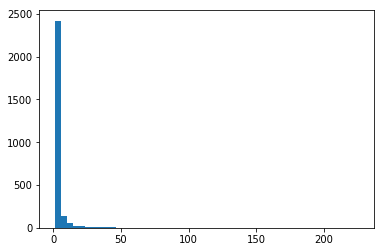

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

nouns = extract_nouns_from(FILEPATH)
data = nouns.values()

# ヒストグラムを出力
plt.hist(data, bins=50)
plt.show()

### Q46. ジップ（Zipf）の法則
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)の全単語を抽出し、単語の出現頻度順位を横軸、その出現頻度を縦軸する両対数グラフを表示せよ（[言語処理100本ノック 2015 Q.39 改題](http://www.cl.ecei.tohoku.ac.jp/nlp100/)より）。

なお、散布図の表示にはmatplotlibライブラリを用いるとよい。以下にサンプルコードを記す：

``` sample.py
import math
import matplotlib.pyplot as plt
%matplotlib inline

# X = [0, 0.1, 0.2, ..... 9.9]
X = [0.1 * i for i in range(100)]
# y = exp(2x+1)
Y = [math.exp(2 * x + 1) for x in X]

# 散布図を表示
plt.scatter(X, Y)
plt.yscale("log")
plt.show()
```

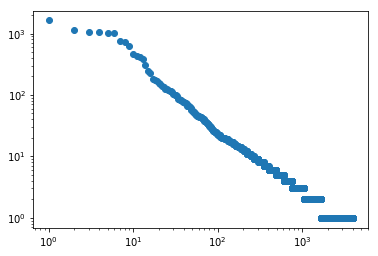

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

term_frequency = calc_term_frequency_from(FILEPATH)

rank = 1
stats = []
for term, freq in sorted(term_frequency.items(), key=lambda x:x[1], reverse=True):
    stats.append((rank, freq))
    rank += 1
    
X = [s[0] for s in stats]
Y = [s[1] for s in stats]

 
# 散布図を描画
plt.scatter(X, Y)
plt.xscale("log")
plt.yscale("log")
plt.show()

### Q47. 文の抽出
[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)の文章を文に切り分けたものを、リストsentencesに格納せよ。さらに文の総数（リストsentencesの長さ）を求めよ。なお、切り分ける際、文に登場する空白文字、カギ括弧、および改行記号は除去せよ。

In [9]:
def split_sentence(t):
    t= t.replace("\n", "")
    results = []
    for s in t.split("。"):
        for ss in s.split("！"):
            if ss != '':
                results.append(ss.strip())
    return results

def get_sentences(filepath=FILEPATH):
    sentences = []
    with open(filepath) as f:
        text = f.read().replace("　", "").replace("「", "").replace("」", "")
        sentences = split_sentence(text)
    return sentences

sentences = get_sentences()
print(len(sentences))

1034


### Q48. Sentence frequency
一般に文書は複数の文から構成される。ある単語が出現する文の数をsentence frequencyと呼ぶことにする。

[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)に出現する全名詞について、そのsentence frequencyを計算し、
* 単語の原形をキー、
* sentence frequencyをバリュー

とする辞書形式で結果を表示せよ。

In [10]:
def calc_sentence_frequency(filepath=FILEPATH):
    t = Tokenizer()
    sentences = get_sentences(filepath)    
    sentence_frequency = {}
    for sentence in sentences:
        tokens = t.tokenize(sentence)
        tmp_nouns = set()
        for token in tokens:
            pos = token.part_of_speech.split(",")[0]
            detail_pos = token.part_of_speech.split(",")[1]
            if pos == "名詞" and detail_pos not in ["数", "代名詞", "接尾", "副詞可能", "非自立"]:
                tmp_nouns.add(token.base_form)
        for noun in tmp_nouns:
            sentence_frequency.setdefault(noun, 0)
            sentence_frequency[noun] += 1

    return sentence_frequency

calc_sentence_frequency()

{'始まり': 1,
 '碗': 7,
 '薬用': 1,
 '茶': 102,
 '人情': 6,
 '飲料': 10,
 '域': 5,
 '世紀': 34,
 '遊び': 2,
 '詩歌': 3,
 '一つ': 11,
 'シナ': 32,
 '高雅': 3,
 '日本': 27,
 '審美': 9,
 '茶道': 22,
 '宗教': 11,
 '日常': 3,
 '俗事': 1,
 '純粋': 2,
 '調和': 8,
 '神秘': 4,
 '社会': 10,
 'ローマン': 2,
 '主義': 19,
 '生活': 12,
 '秩序': 2,
 '諄々': 1,
 '相互': 1,
 '崇拝': 11,
 '一種': 6,
 '儀式': 12,
 '不完全': 4,
 '要義': 1,
 '人生': 19,
 '成就': 1,
 '不可解': 1,
 '企て': 1,
 '可能': 8,
 '意味': 15,
 '普通': 7,
 '原理': 6,
 '天人': 1,
 '見解': 1,
 '倫理': 3,
 '清潔': 4,
 '衛生': 2,
 '慰安': 2,
 '単純': 5,
 '複雑': 2,
 'ぜいたく': 1,
 '経済': 2,
 '幾何': 1,
 '比例': 1,
 '精神': 28,
 '宇宙': 9,
 '定義': 3,
 '趣味': 6,
 '道': 26,
 '東洋': 14,
 '信者': 2,
 '貴族': 3,
 '民主': 1,
 '世界': 7,
 '一助': 1,
 '非常': 16,
 '間': 17,
 '発達': 8,
 '好都合': 1,
 '孤立': 1,
 '自省': 1,
 '習慣': 12,
 '絵画': 10,
 '——': 13,
 '住居': 1,
 '漆器': 3,
 '衣食': 1,
 '影響': 10,
 '陶': 4,
 '文学': 2,
 '存在': 3,
 '無視': 6,
 '研究': 6,
 '文化': 8,
 '閨': 2,
 '優雅': 1,
 '賤': 2,
 '貴人': 1,
 '房': 2,
 '田夫': 1,
 '花': 68,
 '野人': 1,
 '山水': 3,
 '男': 5,
 '俗': 3,
 '茶気': 3,
 '身の上': 2,
 'まじめ':

### Q49. 共起語の取得
ある文の中に単語$t_A$と単語$t_B$が登場するとき、「$t_A$と$t_B$は共起する」と呼ぶことにする。また、文書中に単語$t_A$と単語$t_B$が登場する文がN個存在するとき、「$t_A$と$t_B$の共起回数をN回」と定義する。

[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)の文章の中で単語「茶」と共起する名詞を抽出し、共起回数順（降順）に表示せよ。

In [11]:
def get_correlated_terms(term, sentences):
    t = Tokenizer()
    correlated_terms = {}
    for sentence in sentences:
        if term in sentence:
            _correlated_terms = set()
            tokens = t.tokenize(sentence)
            for token in tokens:
                pos = token.part_of_speech.split(",")[0]
                detail_pos = token.part_of_speech.split(",")[1]
                if pos == "名詞" and term not in token.base_form and detail_pos not in ["数", "代名詞", "接尾", "副詞可能", "非自立"]:
                    _correlated_terms.add(token.base_form)
            for _ct in _correlated_terms:
                correlated_terms.setdefault(_ct, 0)
                correlated_terms[_ct] += 1
    return correlated_terms
          
sentences = get_sentences()    
correlated_terms = get_correlated_terms("茶", sentences)

for term, freq in sorted(correlated_terms.items(), key=lambda x:x[1], reverse=True):
    print(term, freq)

世紀 14
宗匠 13
芸術 12
日本 11
儀式 11
理想 11
禅 11
宋 10
シナ 9
花 9
西洋 8
葉 8
利休 8
普通 7
人 7
時代 7
碗 6
主義 6
立派 6
音 6
考え 6
陸 6
宗教 5
崇拝 5
意味 5
発達 5
客 5
独立 5
有名 5
名 5
道教 5
わが国 5
関係 5
建築 5
装飾 5
生花 5
飲料 4
非常 4
影響 4
精神 4
味 4
ヨーロッパ 4
詩人 4
同様 4
いろいろ 4
粉 4
唐 4
経 4
人生 4
清浄 4
審美 3
日常 3
調和 3
社会 3
生活 3
原理 3
間 3
そのもの 3
重要 3
微妙 3
確立 3
塩 3
美 3
関連 3
思想 3
術 3
絵画 3
—— 3
価値 3
鑑賞 3
流行 3
違い 3
団 3
たて 3
湯 3
竹 3
選択 3
王 3
無垢 3
僧 3
草 3
偉大 3
充分 3
簡素 3
太閤 3
完成 3
自己 3
露地 3
感情 3
主人 3
満足 3
最後 3
人情 2
純粋 2
ローマン 2
秩序 2
世界 2
男 2
俗 2
非難 2
気分 2
浮世 2
人間 2
東洋 2
一般 2
注意 2
唯一 2
役 2
税 2
主要 2
旅行 2
東 2
輸入 2
習慣 2
身 2
現代 2
アメリカ 2
芳香 2
家庭 2
植物 2
ひそか 2
流 2
名人 2
名画 2
水 2
個性 2
俗悪 2
流派 2
国民 2
愛好 2
文化 2
明 2
古典 2
自然 2
南 2
臼 2
古代 2
域 2
中葉 2
源 2
器具 2
次 2
陶 2
製 2
興味 2
連関 2
色 2
沸 2
章 2
世 2
永久 2
方法 2
珍 2
風流 2
力 2
南方 2
教義 2
菩提 2
像 2
達磨 2
現今 2
説明 2
使用 2
姿 2
目的 2
統一 2
老子 2
密接 2
話 2
庭 2
些事 2
部類 2
趣 2
配合 2
秀吉 2
家 2
待合 2
材料 2
特殊 2
美的 2
趣味 2
外界 2
効果 2
武士 2
清潔 2
必要 2
屋内 2
心 2
美術 2
床の間 2
門人 2
花瓶 2
夏 2
始まり 1
薬用 1
俗事 1
神秘 1
諄々 1
相互 1
一種 1
不完全 1
要義 1
一助 1
好都合 1
孤立 1
自省 1

### Q50. 共起度の計算
文書中に文が$N$個あるとする。単語$t_A$のsentence_frequencyを$C(t_A)$、単語Bのsentence_frequencyを$C(t_B)$、単語$t_A$と単語$t_B$が同一文に出現する回数（共起回数）を$C(t_A,t_B)$としたとき、単語$t_A$と単語$t_B$の共起度を下記の式で定義する：

$$ log \frac{Pr(t_B | t_A)}{Pr(t_A)} = log \frac{Pr(t_A,t_B)}{Pr(t_A)Pr(t_B)} = log \frac{N \cdot C(t_A,t_B)}{C(t_A) \cdot C(t_B)} $$

[「茶の本」の文書](https://raw.githubusercontent.com/trycycle/data-science-bootcamp/master/data/natural-language-processing/cha_no_hon.txt)を形態素解析し、共起度が高い名詞のペアを上位20件表示せよ。ただし、共起度の計算対象とする語は、sentence frequencyが3以上の語とせよ。

In [12]:
import math

def calc_pmi(c_a, c_b, c_ab, n):
    return math.log((n * c_ab) / (c_a * c_b))

t_a = "茶"
sentences = get_sentences(FILEPATH)
n = len(sentences)
correlated_terms = get_correlated_terms(t_a, sentences)
sentence_frequency = calc_sentence_frequency(FILEPATH)
c_a = sentence_frequency[t_a]

pmi_values = {}
for t_b, c_ab in correlated_terms.items():
    c_b = sentence_frequency[t_b]
    if t_a != t_b and c_b >= 3:
        if (t_a, t_b) not in pmi_values and (t_b, t_a) not in pmi_values:
            pmi = calc_pmi(c_a, c_b, c_ab, n)
            pmi_values[t_b] = pmi
            
for t_b, pmi in sorted(pmi_values.items(), key=lambda x:x[1], reverse=True):
    print(t_b, pmi)

日常 2.3162172417841034
普通 2.3162172417841034
味 2.3162172417841034
団 2.3162172417841034
粉 2.3162172417841034
たて 2.3162172417841034
湯 2.3162172417841034
竹 2.3162172417841034
無垢 2.3162172417841034
満足 2.3162172417841034
儀式 2.2292058647944737
碗 2.162066561956845
清浄 2.0930736904698937
確立 2.0285351693323226
関連 2.0285351693323226
流行 2.0285351693323226
陸 2.0285351693323226
草 2.0285351693323226
簡素 2.0285351693323226
俗 1.910752133675939
役 1.910752133675939
家庭 1.910752133675939
俗悪 1.910752133675939
葉 1.910752133675939
明 1.910752133675939
源 1.910752133675939
器具 1.910752133675939
連関 1.910752133675939
沸 1.910752133675939
章 1.910752133675939
永久 1.910752133675939
像 1.910752133675939
使用 1.910752133675939
些事 1.910752133675939
発達 1.846213612538368
独立 1.846213612538368
関係 1.846213612538368
微妙 1.8053916180181127
塩 1.8053916180181127
王 1.8053916180181127
主人 1.8053916180181127
宋 1.785588990721933
ヨーロッパ 1.7566014538486807
理想 1.718380241028483
原理 1.623070061224158
唯一 1.623070061224158
音 1.623070061224158
ひそか 1.6